In [4]:
import numpy as np
import matplotlib.pyplot as plt 
import matplotlib.animation as ani
import matplotlib.cm as cm 




# allows animation features within notebook
%matplotlib notebook

In [5]:
timesteps = np.arange(0,5,0.01)
vector = np.array([0.0,0.0,0.0])
center = np.zeros(np.shape(vector))
np.shape(vector)

(3,)

In [21]:

class Particle:
    def __init__(self, timesteps, mass=1, charge=1, force=np.zeros((timesteps.size,3)), dt=timesteps.size / 100000):
        self.mass = mass
        self.charge = charge
        self.timesteps = timesteps
        self.force = force
        self.dt = dt

        self.pos = np.zeros(np.shape(vector))
        self.vel = np.zeros(np.shape(vector))
        self.accel = np.zeros(np.shape(vector))
        self.force = np.zeros(np.shape(vector))

  

In [22]:
def make_particle_list(particle_count):
    particle_list = []
    for i in range(particle_count):
        particle_list.append(Particle(timesteps))
    return(particle_list)
        
def set_positions(particle_list):  # sets INITIAL positions of particles as (1,0,0) , (2,0,0) ...
    for i in range(len(particle_list)):
        set_pos = np.random.rand(3)
        particle_list[i].pos = set_pos/np.linalg.norm(set_pos)
        #(set_pos/np.linalg.norm(set_pos))*1.01
        
def calc_forces(particle_list):  # calcs forces between particles
    for i in range(len(particle_list)):
        for j in range(i+1, len(particle_list)):
            sep = particle_list[i].pos[-1] - particle_list[j].pos[-1]
            particle_list[i].force[-1] += (sep / (np.linalg.norm(sep)) ** 3)*0.00001
            particle_list[j].force[-1] -= (sep / (np.linalg.norm(sep)) ** 3)*0.00001
            
            
def update(particle_list):    
    for i in range(len(particle_list)):            
        particle_list[i].accel = particle_list[i].force / particle_list[i].mass
        particle_list[i].vel+= particle_list[i].accel * particle_list[i].dt
        particle_list[i].pos+= particle_list[i].vel * particle_list[i].dt
                            
def make_placeholder(timesteps):
    return np.zeros((timesteps.size,3))

def set_initial_conditions(particle_list, i, vel, pos):
    particle_list[i].pos = pos
    particle_list[i].vel = vel
    
def sphere_constraint(particle_list, center):
    for i in range(len(particle_list)):
        radius = (particle_list[i].pos - center)
        particle_list[i].force = particle_list[i].force + np.dot(particle_list[i].force,radius) 
        
def velocity_constraint(particle_list, center):
     for i in range(len(particle_list)):
        radius = (particle_list[i].pos - center)
        particle_list[i].vel = particle_list[i].vel + np.dot(particle_list[i].vel,radius)
    

In [25]:
#test_list = make_particle_list(3)
#set_positions(test_list)
#print(test_list[2].force)

def run_sim(N,timesteps):   
    
    particle_list = make_particle_list(N)
    set_positions(particle_list)    
    vel = make_placeholder(timesteps)
    pos = make_placeholder(timesteps)        
    for inum, timestep in enumerate(timesteps):        
        vel[inum] = particle_list[2].vel[-1]
        pos[inum] = particle_list[2].pos[-1]
        
        calc_forces(particle_list)
        sphere_constraint(particle_list, center)
        velocity_constraint(particle_list, center)
        update(particle_list)
    return vel,pos

        
    

C:\Users\17348\Anaconda3\lib\site-packages\ipykernel_launcher.py:17: RuntimeWarning: overflow encountered in double_scalars
C:\Users\17348\Anaconda3\lib\site-packages\ipykernel_launcher.py:18: RuntimeWarning: overflow encountered in double_scalars
C:\Users\17348\Anaconda3\lib\site-packages\ipykernel_launcher.py:17: RuntimeWarning: invalid value encountered in double_scalars
C:\Users\17348\Anaconda3\lib\site-packages\ipykernel_launcher.py:18: RuntimeWarning: invalid value encountered in double_scalars


[ 0.23894401  0.238944    0.23894399  0.23894393  0.23894378  0.23894331
  0.23894188  0.23893759  0.23892483  0.23888735  0.23877851  0.23846571
  0.23757502  0.23506046  0.22802794  0.20862803  0.15657715  0.02616882
 -0.24520375 -0.57440089 -0.62975659 -0.6293725  -0.62937431 -0.62937385
         nan         nan         nan         nan         nan         nan
         nan         nan         nan         nan         nan         nan
         nan         nan         nan         nan         nan         nan
         nan         nan         nan         nan         nan         nan
         nan         nan         nan         nan         nan         nan
         nan         nan         nan         nan         nan         nan
         nan         nan         nan         nan         nan         nan
         nan         nan         nan         nan         nan         nan
         nan         nan         nan         nan         nan         nan
         nan         nan         nan         nan   

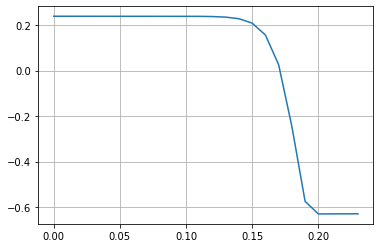

In [26]:
vel,pos = run_sim(3, timesteps)
plt.plot(timesteps,pos[:,2])
plt.grid()
print(pos[:,0])

In [ ]:
abc = np.array([;,;,;])
print(abc)